In [28]:
from family_graph import FamilyGraph
import os
import json

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# Initialize graph
graph = FamilyGraph()

In [30]:
dir_path = "data/bashoutput"

directory = os.fsencode(dir_path)
    
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".json"):
        print(os.path.join(directory.decode("utf-8"), filename))

        with open(os.path.join(directory.decode("utf-8"), filename)) as f:
            parsed_dict = json.load(f)

        #print(json.dumps(parsed_dict, indent=2))

        node_ids = {}
        for person in parsed_dict["persons"]:
            id1 = graph.add_person(person)
            node_ids[person["person_number"]] = id1

        for relation in parsed_dict["relations"]:
            graph.add_relation(
                node_ids[relation["person_number_1"]], 
                node_ids[relation["person_number_2"]], 
                relation["relation_type"]
            )


data/bashoutput/chunkx3.json
data/bashoutput/chunkx2.json
data/bashoutput/chunkx1.json


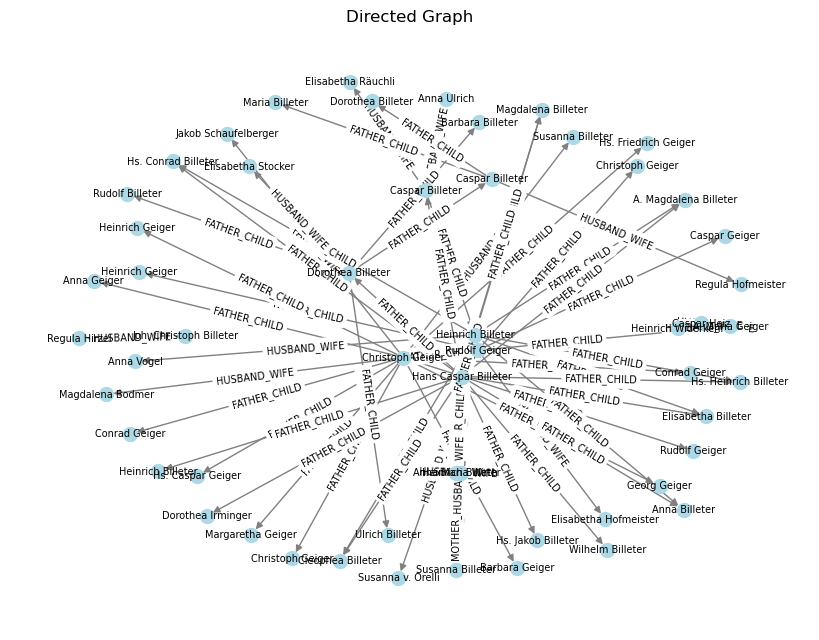

In [31]:
graph.visualize()

In [32]:
# Save graph

import networkx as nx
g2 = graph.G
for node in g2.nodes():
    for key, val in g2.nodes[node].items():
        g2.nodes[node][key] = str(g2.nodes[node][key])
nx.write_gexf(g2, 'data/graph_data/graph_parsed.gexf')